# What is the strength of the relationship between user rating and the number of reviews for Amazon’s best-selling books? and what is the average number of reviews for books with ratings above 4.5 compared to those with ratings below 4.5?

Using an observational retrospective census study

Biases- Users may only rate books higher because they are already popular/ have hype

Biases- Data only comes from Amazon, not other platforms like barnes & noble

Biases - If a book is already a best seller, it may affect conclusions about what makes a book  popular

Biases- Because the dataset only includes best-sellers, it may overrepresent high ratings and large review counts, which could bias the analysis.

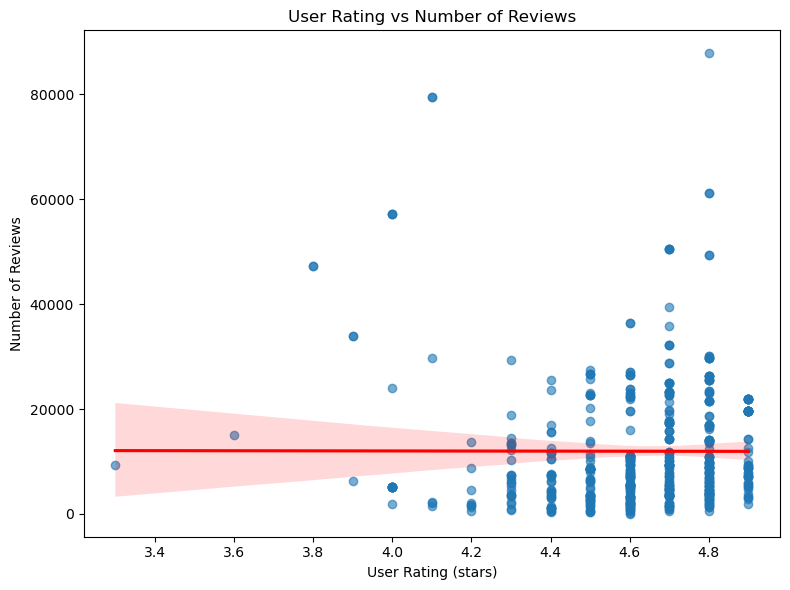


--- Correlation Analysis ---
Pearson correlation (r): -0.002
P-value: 9.677e-01
Conclusion: There is little to no relationship between user rating and number of reviews.


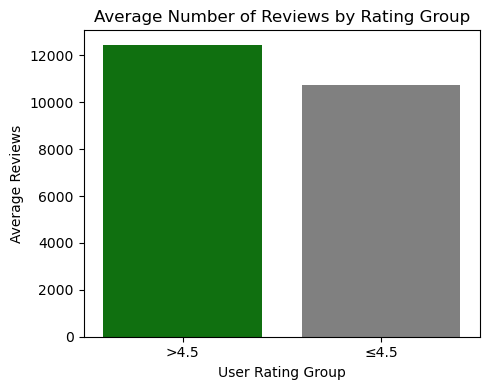


--- Average Reviews by Rating Group ---
Average reviews (rating > 4.5): 12447
Average reviews (rating ≤ 4.5): 10729
Conclusion: High-rated books (>4.5) receive more reviews on average than lower-rated books.


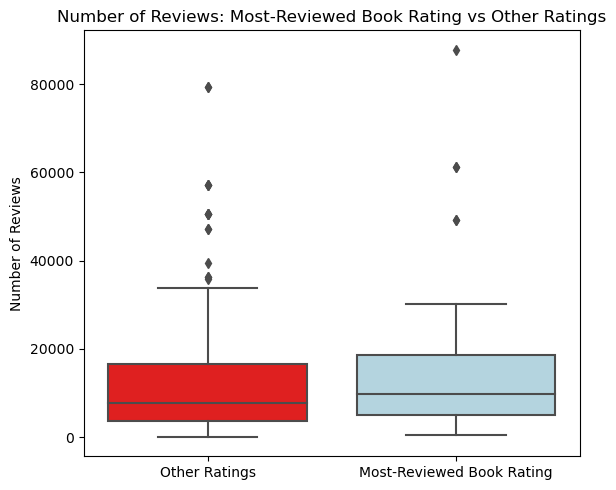


--- Box Plot Comparison ---
Most reviewed book has 87841 reviews with a rating of 4.8
Conclusion: This box plot shows whether other books with the same rating as the most-reviewed book also tend to have high reviews, or if that book is an outlier within its rating group.


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# ======================
# 1. Load Dataset
# ======================
df = pd.read_csv('books.csv')

# Clean and prepare
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')
df['User Rating'] = pd.to_numeric(df['User Rating'], errors='coerce')
df = df.dropna(subset=['User Rating', 'Reviews'])

# ======================
# 2. Scatterplot + Correlation
# ======================
plt.figure(figsize=(8,6))
sns.regplot(
    data=df, x='User Rating', y='Reviews',
    scatter_kws={'alpha':0.6}, line_kws={'color':'red'}
)
plt.title('User Rating vs Number of Reviews')
plt.xlabel('User Rating (stars)')
plt.ylabel('Number of Reviews')
plt.tight_layout()
plt.show()

r, p = pearsonr(df['User Rating'], df['Reviews'])
print("\n--- Correlation Analysis ---")
print(f"Pearson correlation (r): {r:.3f}")
print(f"P-value: {p:.3e}")
if r > 0.5:
    print("Conclusion: There is a moderately strong positive relationship between user rating and number of reviews.")
elif r > 0.2:
    print("Conclusion: There is a weak positive relationship between user rating and number of reviews.")
else:
    print("Conclusion: There is little to no relationship between user rating and number of reviews.")

# ======================
# 3. Average Reviews for >4.5 vs ≤4.5 Rating
# ======================
high = df[df['User Rating'] > 4.5]
low = df[df['User Rating'] <= 4.5]
avg_high = high['Reviews'].mean()
avg_low = low['Reviews'].mean()

plt.figure(figsize=(5,4))
sns.barplot(x=['>4.5','≤4.5'], y=[avg_high, avg_low], palette=['green','gray'])
plt.title('Average Number of Reviews by Rating Group')
plt.ylabel('Average Reviews')
plt.xlabel('User Rating Group')
plt.tight_layout()
plt.show()

print("\n--- Average Reviews by Rating Group ---")
print(f"Average reviews (rating > 4.5): {avg_high:.0f}")
print(f"Average reviews (rating ≤ 4.5): {avg_low:.0f}")
if avg_high > avg_low:
    print("Conclusion: High-rated books (>4.5) receive more reviews on average than lower-rated books.")
else:
    print("Conclusion: High-rated books (>4.5) do not receive more reviews on average than lower-rated books.")

# ======================
# 4. Box Plot: Most Reviewed Book's Rating vs Others
# ======================
# Identify the most-reviewed book's rating
most_reviewed_row = df.loc[df['Reviews'].idxmax()]
top_rating = most_reviewed_row['User Rating']

# Label groups
df['Group'] = df['User Rating'].apply(lambda x: 'Most-Reviewed Book Rating' if x == top_rating else 'Other Ratings')

plt.figure(figsize=(6,5))
sns.boxplot(data=df, x='Group', y='Reviews', palette=['red','lightblue'])
plt.title('Number of Reviews: Most-Reviewed Book Rating vs Other Ratings')
plt.ylabel('Number of Reviews')
plt.xlabel('')
plt.tight_layout()
plt.show()

print("\n--- Box Plot Comparison ---")
print(f"Most reviewed book has {most_reviewed_row['Reviews']} reviews with a rating of {top_rating}")
print("Conclusion: This box plot shows whether other books with the same rating as the most-reviewed book "
      "also tend to have high reviews, or if that book is an outlier within its rating group.")


# Pearson correlation (r): -0.002 (There is a strength of -0.002 between user rating and the number of reviews for Amazon’s best-selling books.
 Average reviews (rating > 4.5): 12447
Average reviews (rating ≤ 4.5): 10729
# Conclusion: High-rated books (>4.5) receive more reviews on average than lower-rated books.
Most reviewed book has 87841 reviews with a rating of 4.8
Conclusion: This box plot shows whether other books with the same rating as the most-reviewed book also tend to have high reviews, or if that book is an outlier within its rating group.